<h1 style="text-align:center"><div style="text-style:bold; font-family:Verdana;font-size=100px">Analiza fantazijskih knjig</div></h1>

<h2 style='text-align:center'> <div style="font-size : 30px; font-style : Verdana; text-align : center "> Priprava </div> </h2>

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import zlato_desetletje
#from operator import itemgetter

In [76]:
podatki = pd.read_csv("C:\\Users\\Benjamin\\Desktop\\Šola\\FMF\\UVP\\UVP_Projektna_naloga_2024\\fantazijska_literatura.csv", index_col='Naslov')

In [77]:
stolpci = podatki.columns

In [78]:
#pd.set_option('display.max_rows', None)

In [79]:
podatki.fillna(0, inplace=True)

In [80]:
podatki

,Avtor,Leta izida,Dolžina,Točke,Ocena,Število bralcev
Naslov,,,,,,
"The Hobbit (The Lord of the Rings, #0)",J.R.R. Tolkien,1937.0,366.0,5793,4.29,4063356
Lost Horizon,James Hilton,1933.0,241.0,1276,3.95,22920
At the Mountains of Madness,H.P. Lovecraft,1931.0,194.0,1185,3.81,55007
"Mary Poppins (Mary Poppins, #1)",P.L. Travers,1934.0,209.0,1169,4.01,134755
"The Sword in the Stone (The Once and Future King, #1)",T.H. White,1938.0,352.0,968,3.89,26880
...,...,...,...,...,...,...
"Duke Elric (Chronicles of the Last Emperor of Melniboné, #4)",Michael Moorcock,2009.0,368.0,90,4.01,279
Elric,Michael Moorcock,2001.0,416.0,89,4.10,3001
"Elric in the Dream Realms (Chronicles of the Last Emperor of Melniboné, #5)",Michael Moorcock,2009.0,448.0,88,3.97,261


In [81]:
podatki['Dolžina'] = podatki['Dolžina'].astype(int, errors='ignore')
podatki['Leta izida'] = podatki['Leta izida'].astype(int, errors='ignore')

In [82]:
podatki

,Avtor,Leta izida,Dolžina,Točke,Ocena,Število bralcev
Naslov,,,,,,
"The Hobbit (The Lord of the Rings, #0)",J.R.R. Tolkien,1937,366,5793,4.29,4063356
Lost Horizon,James Hilton,1933,241,1276,3.95,22920
At the Mountains of Madness,H.P. Lovecraft,1931,194,1185,3.81,55007
"Mary Poppins (Mary Poppins, #1)",P.L. Travers,1934,209,1169,4.01,134755
"The Sword in the Stone (The Once and Future King, #1)",T.H. White,1938,352,968,3.89,26880
...,...,...,...,...,...,...
"Duke Elric (Chronicles of the Last Emperor of Melniboné, #4)",Michael Moorcock,2009,368,90,4.01,279
Elric,Michael Moorcock,2001,416,89,4.10,3001
"Elric in the Dream Realms (Chronicles of the Last Emperor of Melniboné, #5)",Michael Moorcock,2009,448,88,3.97,261


In [83]:
podatki['Desetletje'] = (podatki['Leta izida']//10)*10

In [84]:
podatki = podatki[['Avtor', 'Leta izida', 'Desetletje', 'Dolžina', 'Točke', 'Ocena', 'Število bralcev']]

In [85]:
podatki

,Avtor,Leta izida,Desetletje,Dolžina,Točke,Ocena,Število bralcev
Naslov,,,,,,,
"The Hobbit (The Lord of the Rings, #0)",J.R.R. Tolkien,1937,1930,366,5793,4.29,4063356
Lost Horizon,James Hilton,1933,1930,241,1276,3.95,22920
At the Mountains of Madness,H.P. Lovecraft,1931,1930,194,1185,3.81,55007
"Mary Poppins (Mary Poppins, #1)",P.L. Travers,1934,1930,209,1169,4.01,134755
"The Sword in the Stone (The Once and Future King, #1)",T.H. White,1938,1930,352,968,3.89,26880
...,...,...,...,...,...,...,...
"Duke Elric (Chronicles of the Last Emperor of Melniboné, #4)",Michael Moorcock,2009,2000,368,90,4.01,279
Elric,Michael Moorcock,2001,2000,416,89,4.10,3001
"Elric in the Dream Realms (Chronicles of the Last Emperor of Melniboné, #5)",Michael Moorcock,2009,2000,448,88,3.97,261


In [86]:
po_desetletjih = podatki.groupby('Desetletje')

<h2 style='text-align:center'> <div style="font-size : 30px; font-style : Verdana; text-align : center "> Lestvica najboljših </div> </h2>

<p style="font-family:'Times New Roman', font-size:12px"> Najprej si poglejmo najboljših 10 predstavnikov iz vsake kategorije. Z rezultati si bo lahko vsak ljubitelj fantazijskega žanra pomagal pri odločitvi, katere knjige oz. avtorje se najbolj splača brati</p>

<p style="font-family:'Times New Roman', font-size:12px"> Poizvedimo najprej, katere knjige so najkvalitetnejše. Kot merilo kvalitete vzemimo št. točk oz. "score", kakor so navedene na spletni strani. Točke upoštevajo št. bralcev, ki je ocenilo knjigo, ter povprečno oceno, ki so ji jo prisodili.</p>

In [87]:
po_tockah = pd.DataFrame(podatki['Točke'].sort_values(ascending=False))

In [88]:
po_tockah.head(10)

,Točke
Naslov,
"The Fellowship of the Ring (The Lord of the Rings, #1)",7350
"The Lion, the Witch and the Wardrobe (Chronicles of Narnia, #1)",6133
"The Two Towers (The Lord of the Rings, #2)",6078
"The Return of the King (The Lord of the Rings, #3)",5961
"The Hobbit (The Lord of the Rings, #0)",5793
"A Wizard of Earthsea (Earthsea Cycle, #1)",4526
"The Magician’s Nephew (Chronicles of Narnia, #6)",3520
"The Last Unicorn (The Last Unicorn, #1)",3348
"The Horse and His Boy (Chronicles of Narnia, #5)",3345


<p style="font-family:'Times New Roman', font-size:12px"> Sedaj analizirajmo avtorje po kvaliteti knjig, ki so jih napisali. Kot merilo zopet vzemimo število točk, le da tokrat avtorju pripišimo povprečje točk njegovih knjig.</p>

In [89]:
avtorji = podatki.groupby('Avtor')

In [90]:
avtorji_po_tockah = (pd.DataFrame(avtorji['Točke'].mean())).sort_values(by='Točke',ascending=False)

In [91]:
avtorji_po_tockah['Točke'] = round(avtorji_po_tockah['Točke'], 2)

In [92]:
avtorji_po_tockah.head(10)

,Točke
Avtor,
Ursula K. Le Guin,4526.00
J.R.R. Tolkien,4232.57
Peter S. Beagle,3348.00
Madeleine L'Engle,3332.00
Norton Juster,3238.00
C.S. Lewis,1978.33
Roald Dahl,1823.00
Lloyd Alexander,1532.00
Maurice Sendak,1502.50


<p style="font-family:'Times New Roman', font-size:12px"> Kot zanimivost si poglejmo še, katere so najbolj brane knjige in najbolj brani avtorji ter rezultata primerjajmo z zgornjima. Kot kriterij sem vzel število ljudi, ki je ocenilo knjigo na spletni strani, saj dejanskega števila ljudi, ki so prebrali knjigo, ni mogoče zares ugotoviti.</p>

In [93]:
najbolj_brane_knjige = podatki.sort_values(by='Število bralcev', ascending=False)

In [94]:
po_bralcih = pd.DataFrame(najbolj_brane_knjige['Število bralcev'])

In [95]:
po_bralcih.head(10)

,Število bralcev
Naslov,
"The Hobbit (The Lord of the Rings, #0)",4063356
Animal Farm,3974670
Animal Farm,3974670
"The Lion, the Witch and the Wardrobe (Chronicles of Narnia, #1)",2848164
"The Fellowship of the Ring (The Lord of the Rings, #1)",2845102
The Little Prince,2156335
"A Wrinkle in Time (A Wrinkle in Time Quintet, #1)",1216383
Where the Wild Things Are,1013503
"The Two Towers (The Lord of the Rings, #2)",992726


<p style="font-family:'Times New Roman', font-size:12px"> Še po avtorjih </p>

In [96]:
branost_avtorjev = (pd.DataFrame(avtorji['Število bralcev'].mean())).sort_values(by='Število bralcev', ascending=False)

In [97]:
branost_avtorjev.head(10)

,Število bralcev
Avtor,
George Orwell,3.974670e+06
Antoine de Saint-Exupéry,2.156335e+06
J.R.R. Tolkien,1.361108e+06
Madeleine L'Engle,1.216383e+06
Roald Dahl,6.719225e+05
Maurice Sendak,5.076515e+05
C.S. Lewis,4.540159e+05
Mikhail Bulgakov,3.633580e+05
Ursula K. Le Guin,3.241710e+05


<h2 style='text-align:center'> <div style="font-size : 30px; font-style : Verdana; text-align : center "> Analiza trendov </div> </h2>

<p style="font-family:'Times New Roman', font-size:12px"> Zanima nas tudi podrobnejše dogajanje v fantazijskem žanru.<br> Kot bralci bi se lahko vprašali, kako se tekom let in desetletij spreminjajo kvaliteta, dolžina in branost književnih del. Prav tako bi vsekakor želeli vedeti, ali so daljše knjige tudi kvalitetnejše ter ali ljudje raje berejo daljše ali krajše knjige.<br> Iz rezultatov analite bomo poskusili napovedati trende na tem področju v prihodnosti</p>

In [98]:
podatki

,Avtor,Leta izida,Desetletje,Dolžina,Točke,Ocena,Število bralcev
Naslov,,,,,,,
"The Hobbit (The Lord of the Rings, #0)",J.R.R. Tolkien,1937,1930,366,5793,4.29,4063356
Lost Horizon,James Hilton,1933,1930,241,1276,3.95,22920
At the Mountains of Madness,H.P. Lovecraft,1931,1930,194,1185,3.81,55007
"Mary Poppins (Mary Poppins, #1)",P.L. Travers,1934,1930,209,1169,4.01,134755
"The Sword in the Stone (The Once and Future King, #1)",T.H. White,1938,1930,352,968,3.89,26880
...,...,...,...,...,...,...,...
"Duke Elric (Chronicles of the Last Emperor of Melniboné, #4)",Michael Moorcock,2009,2000,368,90,4.01,279
Elric,Michael Moorcock,2001,2000,416,89,4.10,3001
"Elric in the Dream Realms (Chronicles of the Last Emperor of Melniboné, #5)",Michael Moorcock,2009,2000,448,88,3.97,261


In [99]:
podatki

,Avtor,Leta izida,Desetletje,Dolžina,Točke,Ocena,Število bralcev
Naslov,,,,,,,
"The Hobbit (The Lord of the Rings, #0)",J.R.R. Tolkien,1937,1930,366,5793,4.29,4063356
Lost Horizon,James Hilton,1933,1930,241,1276,3.95,22920
At the Mountains of Madness,H.P. Lovecraft,1931,1930,194,1185,3.81,55007
"Mary Poppins (Mary Poppins, #1)",P.L. Travers,1934,1930,209,1169,4.01,134755
"The Sword in the Stone (The Once and Future King, #1)",T.H. White,1938,1930,352,968,3.89,26880
...,...,...,...,...,...,...,...
"Duke Elric (Chronicles of the Last Emperor of Melniboné, #4)",Michael Moorcock,2009,2000,368,90,4.01,279
Elric,Michael Moorcock,2001,2000,416,89,4.10,3001
"Elric in the Dream Realms (Chronicles of the Last Emperor of Melniboné, #5)",Michael Moorcock,2009,2000,448,88,3.97,261


<h3 style="text-align:center"><div style="font-size : 20px; font-style : Verdana; text-align : center">Odvisnost kvalitete knjige od leta izida</h3>

In [100]:
izid_leto = po_desetletjih.agg(
**{
    'Kvaliteta': pd.NamedAgg(column='Točke', aggfunc='mean')
})

In [101]:
izid_leto.drop(0, inplace=True)

In [102]:
izid_leto['Kvaliteta'] = round(izid_leto['Kvaliteta'], 2)

In [103]:
izid_leto

,Kvaliteta
Desetletje,
1920,217.00
1930,400.68
1940,339.67
1950,1241.12
1960,737.72
1970,124.00
1980,238.00
2000,132.60
2010,91.00


<Axes: xlabel='Desetletje', ylabel='Točke'>

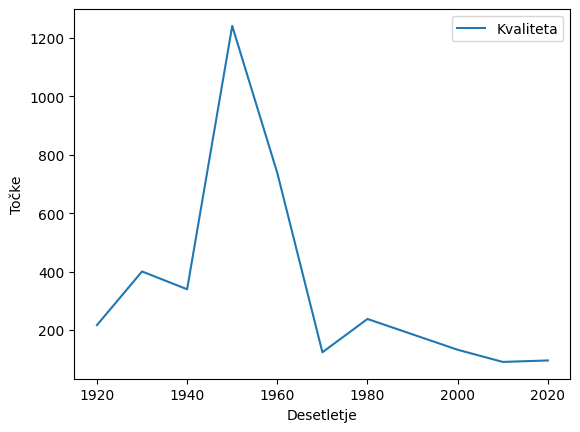

In [104]:
izid_leto.plot(ylabel='Točke')

<p style="font-family:Verdana; font-size:12px"><b>Sklep:</b></p> 

<h3 style="text-align:center"><div style="font-size : 20px; font-style : Verdana; text-align : center">Odvisnost dolžine knjige od leta izida</h3>

In [105]:
leto_dolzina = po_desetletjih.agg(
    **{
'Dolžina': pd.NamedAgg(column='Dolžina', aggfunc='mean')
    })

In [106]:
leto_dolzina.drop(0, inplace=True)

<Axes: xlabel='Desetletje', ylabel='Povprečna dolžina knjig (strani)'>

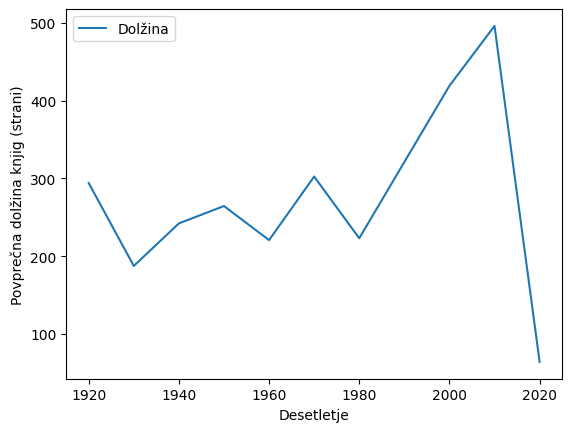

In [107]:
leto_dolzina.plot(ylabel='Povprečna dolžina knjig (strani)')

<p style="font-family:Verdana; font-size:12px"><b>Sklep:</b></p> 

<h3 style="text-align:center"><div style="font-size : 20px; font-style : Verdana; text-align : center">Odvisnost kvalitete knjige od njene dolžine</div></h3>

<p style="font-family:'Times New Roman', font-size:12px"> Radi bi videli, ali so daljše knjige kvalitetnejše. Pogledali bomo, koliko točk povprečno prejme vsaka knjiga iz posameznega razreda, pri čemer en razred predstavljajo tiste knjige, katerih strani dajo pri deljenju s 50 isti celi del.</p>

In [108]:
dolzina_kvaliteta = podatki[['Dolžina', 'Točke']]

In [109]:
dolzina_kvaliteta['Razred dolžine'] = (dolzina_kvaliteta['Dolžina']//50)*50

C:\Users\Benjamin\AppData\Local\Temp\ipykernel_11372\2990771249.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dolzina_kvaliteta['Razred dolžine'] = (dolzina_kvaliteta['Dolžina']//50)*50


In [110]:
dolzina_kvaliteta

,Dolžina,Točke,Razred dolžine
Naslov,,,
"The Hobbit (The Lord of the Rings, #0)",366,5793,350
Lost Horizon,241,1276,200
At the Mountains of Madness,194,1185,150
"Mary Poppins (Mary Poppins, #1)",209,1169,200
"The Sword in the Stone (The Once and Future King, #1)",352,968,350
...,...,...,...
"Duke Elric (Chronicles of the Last Emperor of Melniboné, #4)",368,90,350
Elric,416,89,400
"Elric in the Dream Realms (Chronicles of the Last Emperor of Melniboné, #5)",448,88,400


In [111]:
po_dolzini = dolzina_kvaliteta.groupby('Razred dolžine')

In [112]:
dolzina_tocke = pd.DataFrame(po_dolzini['Točke'].mean())

In [113]:
dolzina_tocke

,Točke
Razred dolžine,
0,433.409091
50,223.000000
100,344.875000
150,568.163636
200,911.625000
250,441.058824
300,682.687500
350,1302.384615
400,980.571429


<Axes: xlabel='Razred dolžine', ylabel='Točke'>

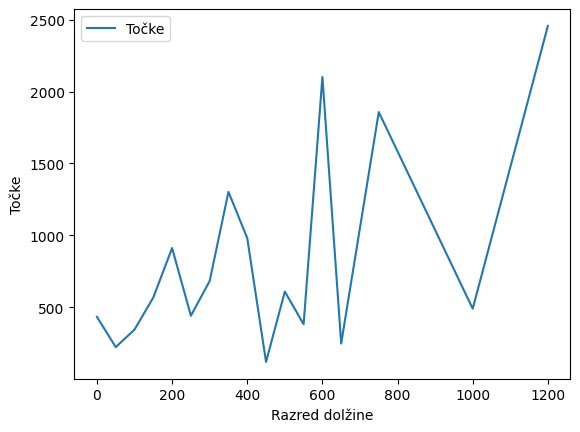

In [114]:
dolzina_tocke.plot(xlabel='Razred dolžine', ylabel='Točke')

<p style="font-family:Verdana; font-size:12px"><b>Sklep:</b></p> 

<h3 style="text-align:center"><div style="font-size : 20px; font-style : Verdana; text-align : center">Odvisnost števila bralcev knjige od njene dolžine</div></h3>

In [115]:
novi_podatki = podatki

In [116]:
novi_podatki['Razred dolžine'] = (novi_podatki['Dolžina']//50)*50 

C:\Users\Benjamin\AppData\Local\Temp\ipykernel_11372\514575360.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  novi_podatki['Razred dolžine'] = (novi_podatki['Dolžina']//50)*50


In [117]:
dolzina_bralstvo_po_razredih = novi_podatki.groupby('Razred dolžine')

In [118]:
po_bralcih = pd.DataFrame(dolzina_bralstvo_po_razredih['Število bralcev'].sum()) 

<Axes: xlabel='Razred dolžine', ylabel='Skupno število bralcev'>

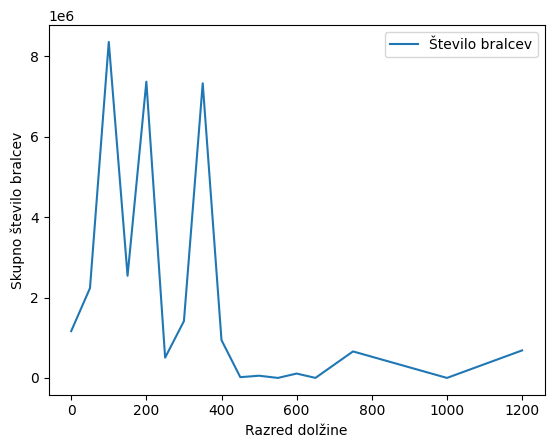

In [119]:
po_bralcih.plot(ylabel='Skupno število bralcev')

<p style="font-family:Verdana; font-size:12px"><b>Sklep:</b></p> 

<h2 style='text-align:center'> <div style="font-size : 30px; font-style : Verdana; text-align : center "> Zlata leta fantazijskega žanra </div> </h2>

<p style="font-family:'Times New Roman', font-size:12px"> Za konec si poglejmo še, katera so bila tista "zlata leta" fantazijskega žanra, tj. v katerem desetletju so nastajali najboljši fantazijski romani. <br> To bomo ugotovili tako, da bomo pogledali razvrstitev desetletij po določenih kategorijah, jim vsakič pripisali neko število točk, na koncu pa točke sešteli in kot najboljše desetletje razglasili tisto desetletje, ki bo imelo največ točk.</p>

In [120]:
analiza_po_desetletjih = po_desetletjih.agg(
**{
    'Število knjig' : pd.NamedAgg(column='Točke', aggfunc='size'),
    'Kvaliteta' : pd.NamedAgg(column='Točke', aggfunc='mean'),
    'Število bralcev' : pd.NamedAgg(column='Število bralcev', aggfunc='sum'),
    'Število avtorjev' : pd.NamedAgg(column='Avtor', aggfunc=lambda x: len(x.unique()))
    
})

In [121]:
analiza_po_desetletjih.drop(0, inplace=True)

In [122]:
analiza_po_desetletjih['Kvaliteta'] = round(analiza_po_desetletjih['Kvaliteta'], 2)

In [123]:
analiza_po_desetletjih

,Število knjig,Kvaliteta,Število bralcev,Število avtorjev
Desetletje,,,,
1920,2,217.00,2371,2
1930,50,400.68,4393747,20
1940,45,339.67,11118562,33
1950,51,1241.12,12308130,26
1960,67,737.72,5393066,37
1970,3,124.00,11040,2
1980,1,238.00,2263,1
2000,10,132.60,29629,3
2010,1,91.00,226,1


In [124]:
zlate_tocke = {
    'Desetletje': [1900 + i*10 for i in range(2,13)],
    'Delež':[],
    'Kvaliteta':[],
    'Število bralcev':[],
    'Število avtorjev':[],
}

<h3 style="text-align:center"><div style="font-size : 20px; font-style : Verdana; text-align : center">Delež knjig, ki so izšle v posameznih desetletjih</div></h3>

<Axes: ylabel='Število knjig'>

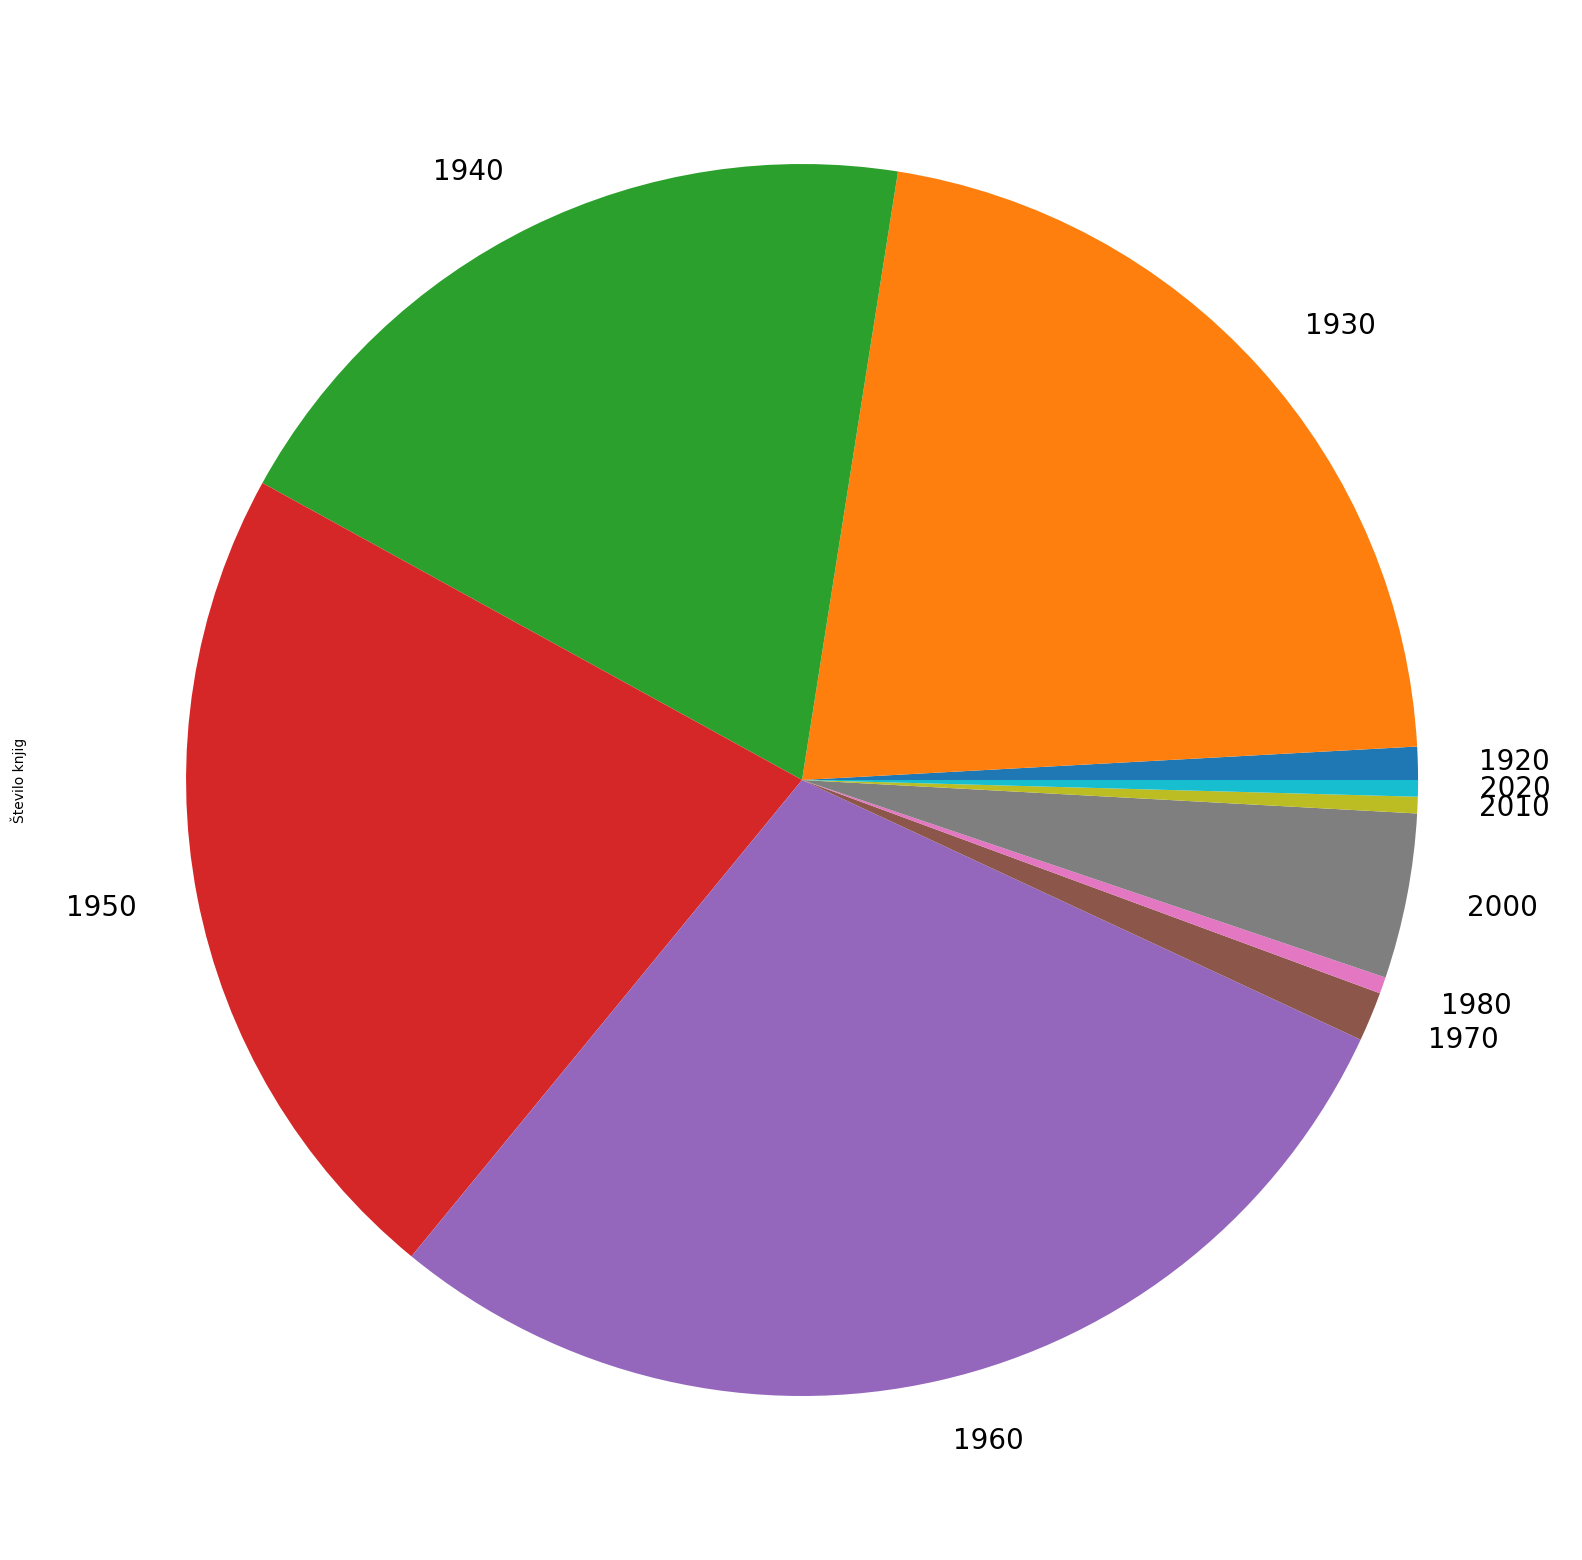

In [125]:
analiza_po_desetletjih['Število knjig'].plot(kind='pie', figsize=(20, 20), fontsize=20, ylabel=None)

In [126]:
analiza_st_knjig = pd.DataFrame(analiza_po_desetletjih['Število knjig'])

In [127]:
analiza_st_knjig

,Število knjig
Desetletje,
1920,2
1930,50
1940,45
1950,51
1960,67
1970,3
1980,1
2000,10
2010,1


In [128]:
zlate_tocke

{'Desetletje': [1920,
  1930,
  1940,
  1950,
  1960,
  1970,
  1980,
  1990,
  2000,
  2010,
  2020],
 'Delež': [],
 'Kvaliteta': [],
 'Število bralcev': [],
 'Število avtorjev': []}

In [129]:
zlate_tocke['Delež'] = mesto_v_tabeli(analiza_st_knjig, 'Število knjig')

<class 'pandas.core.indexes.base.Index'>
[1920, 1930, 1940, 1950, 1960, 1970, 1980, 2000, 2010, 2020]
A
1920
B
A
1930
B
A
1940
B
A
1950
B
A
1960
B
A
1970
B
A
1980
B
A
1990
B
A
2000
B
A
2010
B
A
2020
B
C
[[2, 1920], [50, 1930], [45, 1940], [51, 1950], [67, 1960], [3, 1970], [1, 1980], [10, 2000], [1, 2010], [1, 2020]]
[[1, 1980], [1, 2010], [1, 2020], [2, 1920], [3, 1970], [10, 2000], [45, 1940], [50, 1930], [51, 1950], [67, 1960]]
('D', 0)
('D', 1)
('D', 2)
('D', 3)
('D', 4)
('D', 5)
('D', 6)
('D', 7)
('D', 8)
('D', 9)
[[1980, 0], [2010, 1], [2020, 2], [1920, 3], [1970, 4], [2000, 5], [1940, 6], [1930, 7], [1950, 8], [1960, 9]]
E
[[1920, 3], [1930, 7], [1940, 6], [1950, 8], [1960, 9], [1970, 4], [1980, 0], [2000, 5], [2010, 1], [2020, 2]]
F
G
[3, 7, 6, 8, 9, 4, 0, 5, 1, 2]


In [130]:
print(mesto_v_tabeli(analiza_st_knjig, 'Število knjig'))

<class 'pandas.core.indexes.base.Index'>
[1920, 1930, 1940, 1950, 1960, 1970, 1980, 2000, 2010, 2020]
A
1920
B
A
1930
B
A
1940
B
A
1950
B
A
1960
B
A
1970
B
A
1980
B
A
1990
B
A
2000
B
A
2010
B
A
2020
B
C
[[2, 1920], [50, 1930], [45, 1940], [51, 1950], [67, 1960], [3, 1970], [1, 1980], [10, 2000], [1, 2010], [1, 2020]]
[[1, 1980], [1, 2010], [1, 2020], [2, 1920], [3, 1970], [10, 2000], [45, 1940], [50, 1930], [51, 1950], [67, 1960]]
('D', 0)
('D', 1)
('D', 2)
('D', 3)
('D', 4)
('D', 5)
('D', 6)
('D', 7)
('D', 8)
('D', 9)
[[1980, 0], [2010, 1], [2020, 2], [1920, 3], [1970, 4], [2000, 5], [1940, 6], [1930, 7], [1950, 8], [1960, 9]]
E
[[1920, 3], [1930, 7], [1940, 6], [1950, 8], [1960, 9], [1970, 4], [1980, 0], [2000, 5], [2010, 1], [2020, 2]]
F
G
[3, 7, 6, 8, 9, 4, 0, 5, 1, 2]
[3, 7, 6, 8, 9, 4, 0, 5, 1, 2]


In [131]:
zlate_tocke

{'Desetletje': [1920,
  1930,
  1940,
  1950,
  1960,
  1970,
  1980,
  1990,
  2000,
  2010,
  2020],
 'Delež': [3, 7, 6, 8, 9, 4, 0, 5, 1, 2],
 'Kvaliteta': [],
 'Število bralcev': [],
 'Število avtorjev': []}

<h3 style="text-align:center"><div style="font-size : 20px; font-style : Verdana; text-align : center">Kvaliteta knjig</div></h3>

<Axes: xlabel='Desetletje', ylabel='Povprečno število točk'>

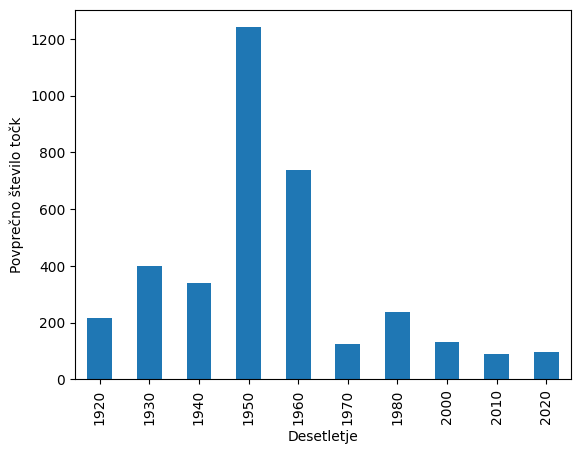

In [132]:
analiza_po_desetletjih['Kvaliteta'].plot(kind='bar', ylabel='Povprečno število točk')

<h3 style="text-align:center"><div style="font-size : 20px; font-style : Verdana; text-align : center">Število bralcev</div></h3>

<Axes: xlabel='Desetletje', ylabel='Število bralcev'>

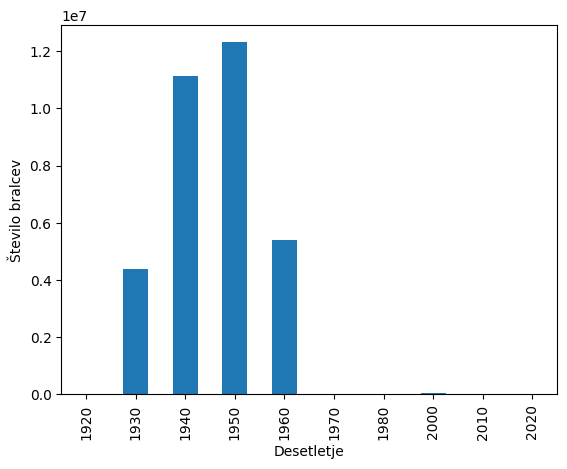

In [133]:
analiza_po_desetletjih['Število bralcev'].plot(kind='bar', ylabel='Število bralcev')

<h3 style="text-align:center"><div style="font-size : 20px; font-style : Verdana; text-align : center">Število piscev fantazijskih romanov</div></h3>

<Axes: xlabel='Desetletje', ylabel='Število ustvarjalcev v obdobju'>

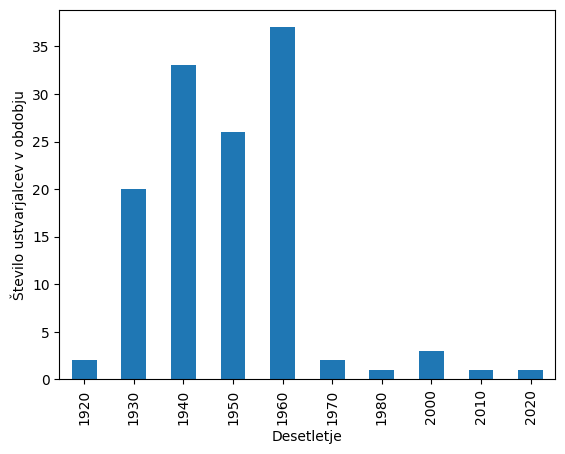

In [134]:
analiza_po_desetletjih['Število avtorjev'].plot(kind='bar', ylabel='Število ustvarjalcev v obdobju')

<p style="font-family:Verdana; font-size:12px"><b>Sklep:</b></p> 

<h2 style='text-align:center'> <div style="font-size : 30px; font-style : Verdana; text-align : center "> Zaključki </div> </h2>